#### Tensorflow에서 MNIST 읽기

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 3s 0us/step


- 각 픽셀의 최댓값이 255이기 때문에 0~1 사이의 값으로 조정(min max scaler와 동일)

#### One-hot-encoding
- loss 함수를 sparse_categorical_crossentropy로 설정하면 같은 효과이다.

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')         # 분류 문제는 softmax
])

model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',     # one-hot-encoding 처리
                metrics=['accuracy'])

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-07-05 21:22:24.183661: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-05 21:22:24.185065: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dense_1 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [14]:
%%time
# import time
# start_time = time.time()
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                epochs=10, batch_size=100, verbose=1)
# print('Fit time :', time.time() - start_time)

Epoch 1/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0069 - accuracy: 0.9983 - val_loss: 0.0837 - val_accuracy: 0.9799
Epoch 2/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0080 - accuracy: 0.9976 - val_loss: 0.0856 - val_accuracy: 0.9788
Epoch 3/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0070 - accuracy: 0.9979 - val_loss: 0.0941 - val_accuracy: 0.9793
Epoch 4/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0060 - accuracy: 0.9980 - val_loss: 0.1016 - val_accuracy: 0.9788
Epoch 5/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0078 - accuracy: 0.9973 - val_loss: 0.0750 - val_accuracy: 0.9806
Epoch 6/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0064 - accuracy: 0.9977 - val_loss: 0.0898 - val_accuracy: 0.9806
Epoch 7/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.0818 - val_accuracy: 0.9823
Epoch 

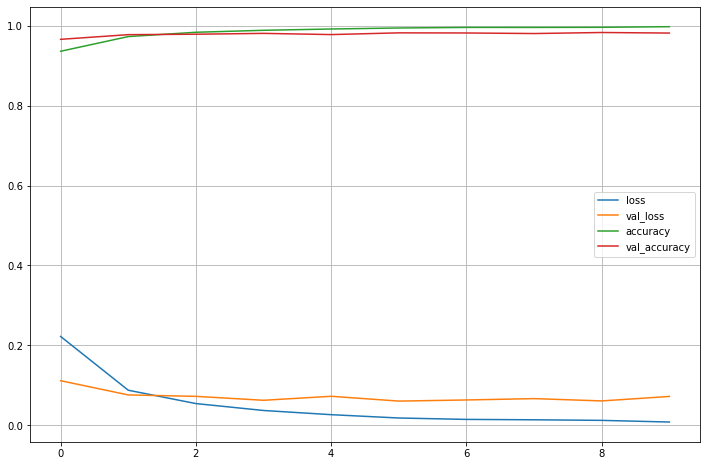

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [7]:
score = model.evaluate(x_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

 14/313 [>.............................] - ETA: 1s - loss: 0.0577 - accuracy: 0.9866 

2022-07-05 21:29:00.807920: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step - loss: 0.0722 - accuracy: 0.9817
Test loss : 0.072215735912323
Test accuracy : 0.98170006275177


In [8]:
# 예측 결과 저장 
import numpy as np

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

 85/313 [=======>......................] - ETA: 0s

2022-07-05 21:30:04.546971: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [9]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [10]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

183

In [11]:
import random

samples = random.choices(population=wrong_result, k=16)
samples

[4966,
 5955,
 1549,
 9745,
 3727,
 1609,
 6847,
 3520,
 321,
 1681,
 3490,
 740,
 1299,
 4966,
 4201,
 720]

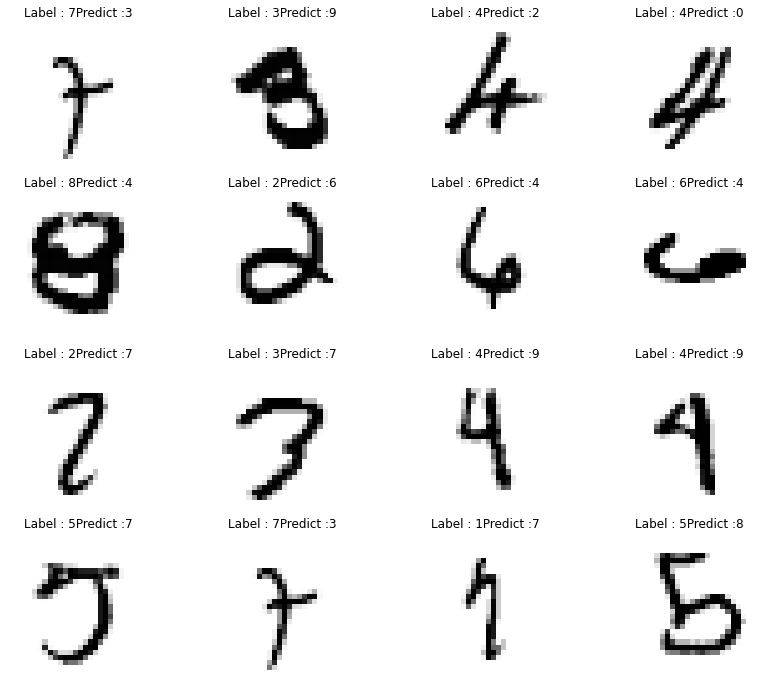

In [12]:
plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_test[n]) + 'Predict :' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()

## MNIST fashion